# Evaluating Sequential Data

This is a quick example to show how to use the evaluation metrics in this library on your synthetic data.

Our current repo is still very much work-in-progress, so you may run into some errors. Also, there will likely be some significant changes to the code structure in the future. We aim to update these notebooks at a later stage.

# Environment

## Library Imports

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import sys
from itertools import product
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Jupyter-specific Imports and Settings

In [4]:
# set printing options
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    get_ipython().run_line_magic('load_ext', 'autoreload')

get_ipython().run_line_magic('autoreload', '2')
from importlib import reload

## Import local libraries

In [70]:
from synthesis.evaluation.metrics import JSDistanceColumns
from synthesis.evaluation.efficacy import TrainBothTestOriginalHoldout
from synthesis.evaluation._base import BaseMetric, BasePredictiveMetric
from synthesis.evaluation.evaluator import SyntheticEvaluator, DEFAULT_METRICS

In [6]:
os.getcwd()

'c:\\projects\\synthetic_data_generation\\examples\\tutorials'

# Load and Preprocess datasets

Load the original and synthetic datasets you created. 

In [22]:
df_original = pd.read_csv('../data/original/adult.csv')
df_original.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
df_synth = pd.read_csv('../data/synthetic/adult_pb_1eps.csv')
df_synth.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,19,State-gov,344804,Bachelors,10,Divorced,Other-service,Not-in-family,White,Female,0,0,72,United-States,<=50K
1,24,Private,37314,Some-college,14,Never-married,Craft-repair,Not-in-family,White,Male,0,0,20,United-States,<=50K
2,29,Private,249078,Some-college,13,Separated,Adm-clerical,Unmarried,White,Female,99999,0,70,United-States,<=50K
3,18,Private,256173,9th,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,38,Self-emp-not-inc,242984,Some-college,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1974,50,United-States,>50K


# Evaluate

For evaluating a synthetic dataset to an original, e can run metrics individually by fitting them on the original and synthetic data. 

Subsequently we can run score and plot (if implemented).

{'age': 0.10666635610710967,
 'workclass': 0.08774993470405375,
 'fnlwgt': 0.5838199278590301,
 'education': 0.05043840536422243,
 'education-num': 0.01842760971623825,
 'marital-status': 0.053531842199113916,
 'occupation': 0.02623747532811313,
 'relationship': 0.004223315441285426,
 'race': 0.04557429828403815,
 'sex': 0.0011532258871775494,
 'capital-gain': 0.15145646613154667,
 'capital-loss': 0.1494556585457859,
 'hours-per-week': 0.13004526016378382,
 'native-country': 0.09782753957213051,
 'income': 0.0008627862092529555}

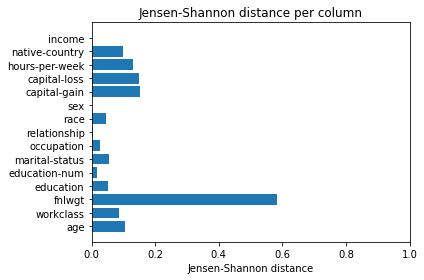

In [59]:
js_distance_columns = JSDistanceColumns().fit(df_original, df_synth)
js_distance_columns.score()
js_distance_columns.plot()

Or we can fit multiple metrics at the same time using the SyntheticEvaluator.

In [60]:
synth_eval = SyntheticEvaluator()
synth_eval.fit(df_original, df_synth)

After fitting you can use the score and plotting functions to see the results.

In [61]:
synth_eval.score()

{'js_distance_columns': {'age': 0.10666635610710967,
  'workclass': 0.08774993470405375,
  'fnlwgt': 0.5838199278590301,
  'education': 0.05043840536422243,
  'education-num': 0.01842760971623825,
  'marital-status': 0.053531842199113916,
  'occupation': 0.02623747532811313,
  'relationship': 0.004223315441285426,
  'race': 0.04557429828403815,
  'sex': 0.0011532258871775494,
  'capital-gain': 0.15145646613154667,
  'capital-loss': 0.1494556585457859,
  'hours-per-week': 0.13004526016378382,
  'native-country': 0.09782753957213051,
  'income': 0.0008627862092529555},
 'js_distance_average': 0.10049800676752546,
 'associations': 2.0212790572602137}

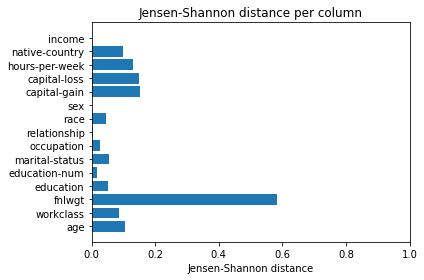

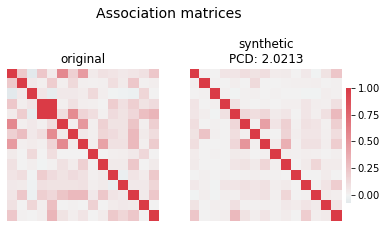

In [62]:
synth_eval.plot()

SyntheticEvaluator uses the following default metrics. 

In [63]:
DEFAULT_METRICS

{'js_distance_columns': <synthesis.evaluation.metrics.JSDistanceColumns at 0x14d93318130>,
 'js_distance_average': <synthesis.evaluation.metrics.JSDistanceAverage at 0x14d93318fd0>,
 'associations': <synthesis.evaluation.metrics.Associations at 0x14d93318520>}

You can remove or add additional metrics and specify these at initialisation using a dictionary as seen below.

Custom metrics should inherent from synthesis.evaluation._base.BaseMetric and should have at least have a fit and score function (plot is optional).

In [64]:
class CustomMetric(BaseMetric):
    """Example metric that checks whether both dataset have same length"""

    def fit(self, data_original, data_synthetic):
        self.stats_original_ = data_original.shape[0]
        self.stats_synthetic_ = data_synthetic.shape[0]
    
    def score(self):
        return self.stats_original_ == self.stats_synthetic_
    
    def plot(self):
        pass

In [65]:
custom_metrics = {
    'same_length': CustomMetric(),
    'js_distance_columns': JSDistanceColumns()
}

In [66]:
se_custom = SyntheticEvaluator(metrics=custom_metrics)
se_custom.fit(df_original, df_synth)

{'same_length': True,
 'js_distance_columns': {'age': 0.10666635610710967,
  'workclass': 0.08774993470405375,
  'fnlwgt': 0.5838199278590301,
  'education': 0.05043840536422243,
  'education-num': 0.01842760971623825,
  'marital-status': 0.053531842199113916,
  'occupation': 0.02623747532811313,
  'relationship': 0.004223315441285426,
  'race': 0.04557429828403815,
  'sex': 0.0011532258871775494,
  'capital-gain': 0.15145646613154667,
  'capital-loss': 0.1494556585457859,
  'hours-per-week': 0.13004526016378382,
  'native-country': 0.09782753957213051,
  'income': 0.0008627862092529555}}

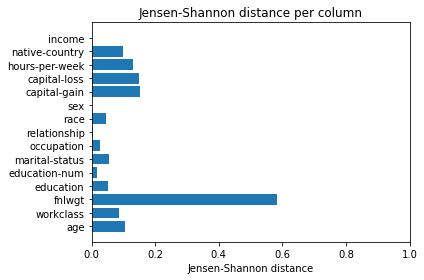

In [67]:
se_custom.score()
se_custom.plot()

# Evaluating Efficacy

We support also metrics that evaluate the efficacy of synthetic dataset, like machine learning or survival analysis.

These can be run standalone. These are currently not supported by the SyntheticEvaluator class (will be adapted later).

In [72]:
tbtoh = TrainBothTestOriginalHoldout(y_column='income', random_state=42)
tbtoh.fit(df_original, df_synth)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100, total=   1.5s
[CV] classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100, total=   1.5s
[CV] classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100 
[CV]  classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100, total=   1.2s
[CV] classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100 
[CV]  classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100, total=   1.0s
[CV] classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100 
[CV]  classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100, total=   1.4s
[CV] classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=

[CV]  classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=100, total=   1.4s
[CV] classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=100 
[CV]  classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=100, total=   1.5s
[CV] classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=150 
[CV]  classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=150, total=   2.2s
[CV] classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=150 
[CV]  classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=150, total=   2.0s
[CV] classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=

[CV]  classifier__criterion=entropy, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=150, total=   1.8s
[CV] classifier__criterion=entropy, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=150 
[CV]  classifier__criterion=entropy, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=150, total=   1.7s
[CV] classifier__criterion=entropy, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=150 
[CV]  classifier__criterion=entropy, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=150, total=   1.7s
[CV] classifier__criterion=entropy, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=150 
[CV]  classifier__criterion=entropy, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=150, total=   1.9s
[CV] classifier__criterion=entropy, classifier__max_depth=10, classifier__max_f

[CV]  classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=150, total=   1.4s
[CV] classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=150 
[CV]  classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=150, total=   1.7s
[CV] classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=150 
[CV]  classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=150, total=   1.6s
[CV] classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=200 
[CV]  classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=200, total=   2.0s
[CV] classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_esti

[CV]  classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200, total=   1.9s
[CV] classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200 
[CV]  classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200, total=   2.3s
[CV] classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200 
[CV]  classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200, total=   2.3s
[CV] classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200 
[CV]  classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200, total=   2.4s
[CV] classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_esti

[CV]  classifier__criterion=gini, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=200, total=   2.2s
[CV] classifier__criterion=gini, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=200 
[CV]  classifier__criterion=gini, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=200, total=   2.3s
[CV] classifier__criterion=gini, classifier__max_depth=10, classifier__max_features=log2, classifier__n_estimators=100 
[CV]  classifier__criterion=gini, classifier__max_depth=10, classifier__max_features=log2, classifier__n_estimators=100, total=   1.1s
[CV] classifier__criterion=gini, classifier__max_depth=10, classifier__max_features=log2, classifier__n_estimators=100 
[CV]  classifier__criterion=gini, classifier__max_depth=10, classifier__max_features=log2, classifier__n_estimators=100, total=   0.9s
[CV] classifier__criterion=gini, classifier__max_depth=10, classifier__max_features=log2, classifier

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  4.8min finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100, total=   1.1s
[CV] classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100, total=   1.2s
[CV] classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100 
[CV]  classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100, total=   1.1s
[CV] classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100 
[CV]  classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100, total=   1.1s
[CV] classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100 
[CV]  classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100, total=   1.2s
[CV] classifier__criterion=entropy, classifier__max_depth=3, classifier__max_features=

[CV]  classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=100, total=   0.7s
[CV] classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=100 
[CV]  classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=100, total=   0.6s
[CV] classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=150 
[CV]  classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=150, total=   0.9s
[CV] classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=150 
[CV]  classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=150, total=   0.9s
[CV] classifier__criterion=entropy, classifier__max_depth=5, classifier__max_features=

[CV]  classifier__criterion=entropy, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=150, total=   1.0s
[CV] classifier__criterion=entropy, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=150 
[CV]  classifier__criterion=entropy, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=150, total=   1.0s
[CV] classifier__criterion=entropy, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=150 
[CV]  classifier__criterion=entropy, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=150, total=   1.0s
[CV] classifier__criterion=entropy, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=150 
[CV]  classifier__criterion=entropy, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=150, total=   1.0s
[CV] classifier__criterion=entropy, classifier__max_depth=10, classifier__max_f

[CV]  classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=150, total=   0.9s
[CV] classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=150 
[CV]  classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=150, total=   0.9s
[CV] classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=150 
[CV]  classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=150, total=   1.0s
[CV] classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=200 
[CV]  classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=200, total=   1.3s
[CV] classifier__criterion=gini, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_esti

[CV]  classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200, total=   1.3s
[CV] classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200 
[CV]  classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200, total=   1.3s
[CV] classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200 
[CV]  classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200, total=   1.3s
[CV] classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200 
[CV]  classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200, total=   1.3s
[CV] classifier__criterion=gini, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_esti

[CV]  classifier__criterion=gini, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=200, total=   1.4s
[CV] classifier__criterion=gini, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=200 
[CV]  classifier__criterion=gini, classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=200, total=   1.3s
[CV] classifier__criterion=gini, classifier__max_depth=10, classifier__max_features=log2, classifier__n_estimators=100 
[CV]  classifier__criterion=gini, classifier__max_depth=10, classifier__max_features=log2, classifier__n_estimators=100, total=   0.6s
[CV] classifier__criterion=gini, classifier__max_depth=10, classifier__max_features=log2, classifier__n_estimators=100 
[CV]  classifier__criterion=gini, classifier__max_depth=10, classifier__max_features=log2, classifier__n_estimators=100, total=   0.6s
[CV] classifier__criterion=gini, classifier__max_depth=10, classifier__max_features=log2, classifier

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.9min finished


We unfortunately didn't create a test dataset before generating the data. Hence, for this example we use the original dataset as the test data (not advised - will be adapted later).

In [74]:
df_original_test = df_original.copy()
tbtoh.score(df_original_test)

{'roc_auc_original': 0.857780971649726,
 'roc_auc_synthetic': 0.8462880318746082}

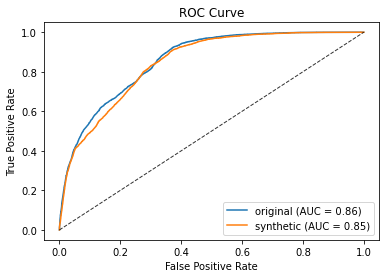

In [77]:
tbtoh.plot(df_original_test)